In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from mpl_toolkits import mplot3d
import matplotlib as mp



iris=pd.read_csv("iris.csv")

In [2]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [3]:
#label encoding
from sklearn import preprocessing 
  
 
label_encoder = preprocessing.LabelEncoder() 
  
 
iris['species']= label_encoder.fit_transform(iris['species']) 
  
iris['species'].unique() 

array([0, 1, 2])

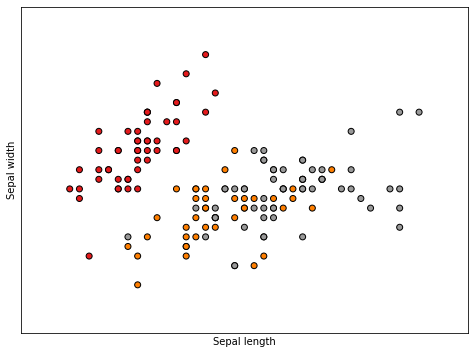

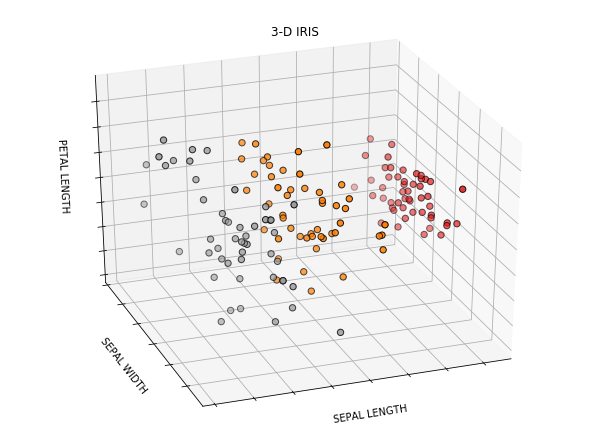

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())



# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("3-D IRIS")
ax.set_xlabel("SEPAL LENGTH")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("SEPAL WIDTH")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("PETAL LENGTH")
ax.w_zaxis.set_ticklabels([])

plt.show()

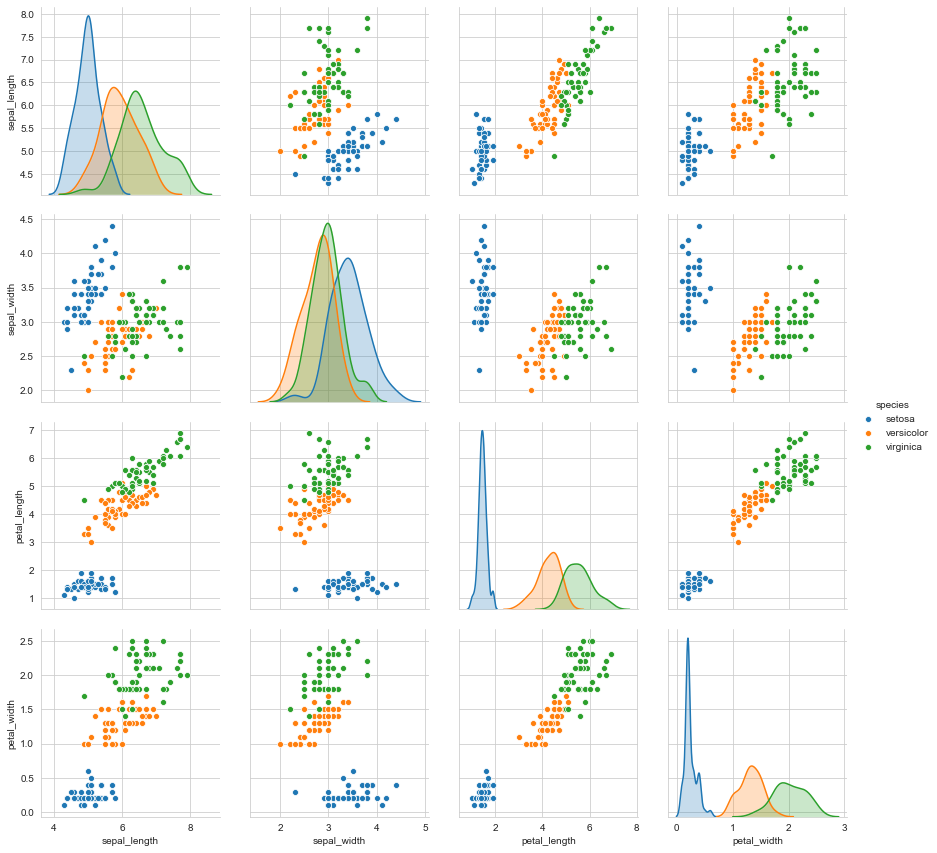

In [5]:
#PAIR-PLOT
iris = sb.load_dataset("iris")
sb.set_style("whitegrid")
sb.pairplot(iris,hue="species",height=3)
plt.show()

In [6]:
#ML MODEL
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [7]:
X_train,X_test,y_train,y_test= train_test_split(X, y,random_state= 5) 

In [8]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

pred_lr = model_lr.predict(X_test)

print(confusion_matrix(y_test, pred_lr))
print("Accuracy Using Logistic Regression is {}".format(accuracy_score(y_test, pred_lr)))

[[12  0  0]
 [ 1  2 11]
 [ 1  0 11]]
Accuracy Using Logistic Regression is 0.6578947368421053


/home/anirudh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/anirudh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [9]:
from sklearn.svm import SVC

model_s = SVC()
model_s.fit(X_train, y_train)

/home/anirudh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [10]:
pred_s = model_s.predict(X_test)

print(confusion_matrix(y_test, pred_s))
print("Accuracy Using SVM is {}".format(accuracy_score(y_test, pred_s)))

[[12  0  0]
 [ 0 12  2]
 [ 0  4  8]]
Accuracy Using SVM is 0.8421052631578947
